In [1]:
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
CARIACO <- read.csv("../DATA/Combined_CARIACO_data_v3.csv")

In [3]:
str(CARIACO)

'data.frame':	256 obs. of  98 variables:
 $ X                           : int  203 204 205 206 207 208 209 210 211 212 ...
 $ cdww                        : num  0.000912 0.000934 0.000979 0.001028 0.001057 ...
 $ iews                        : num  -0.0544 -0.0576 -0.0681 -0.0856 -0.0961 ...
 $ inss                        : num  -0.0257 -0.0315 -0.0372 -0.0471 -0.0529 ...
 $ mcc                         : num  0.0971 0.0715 0.0764 0.079 0.0671 ...
 $ mwp                         : num  5.12 5.15 5.24 4.75 4.76 ...
 $ si10                        : num  6.11 6.5 7.02 7.79 8.15 ...
 $ sp                          : num  101075 101168 101169 101174 101191 ...
 $ sst                         : num  301 299 299 298 298 ...
 $ t2m                         : num  300 299 298 298 298 ...
 $ tauoc                       : num  0.979 0.975 0.967 0.959 0.954 ...
 $ u10                         : num  -5.31 -5.45 -5.86 -6.57 -6.83 ...
 $ ust                         : num  -0.0421 -0.0441 -0.0501 -0.0611 -0

In [4]:
library(ggplot2)

In [5]:
ggcorr(CARIACO)

ERROR: Error in ggcorr(CARIACO): konnte Funktion "ggcorr" nicht finden


In [49]:
CARIACO_sub1 <- CARIACO %>%
    select(

          si10,
          u10,
          v10,
          sst,
           
          e,
          mtpr,
           
           NO3_NO2_USF,
           NH4_USF,
           POC_ug_L,
           NO3_merged,
           PO4_merged,
           SiO4_merged,
           PrimaryProductivity,
           Chlorophyll,
           Phaeopigments,
           
           temp_25,
           Isopycnal_21,
           MLD_potemp,
           
           total_biomass,
        SeaWiFS_chla,
        MODIS_chla
          ) %>%
    mutate(wind_speed_10m = si10, wind_speed_u_comp = u10, wind_speed_v_comp = v10, 
           SST=sst, evaportaion = e, precipiation=mtpr) %>%
select(-si10,-u10,
          -v10,
          -sst,
           
          -e,
          -mtpr,)

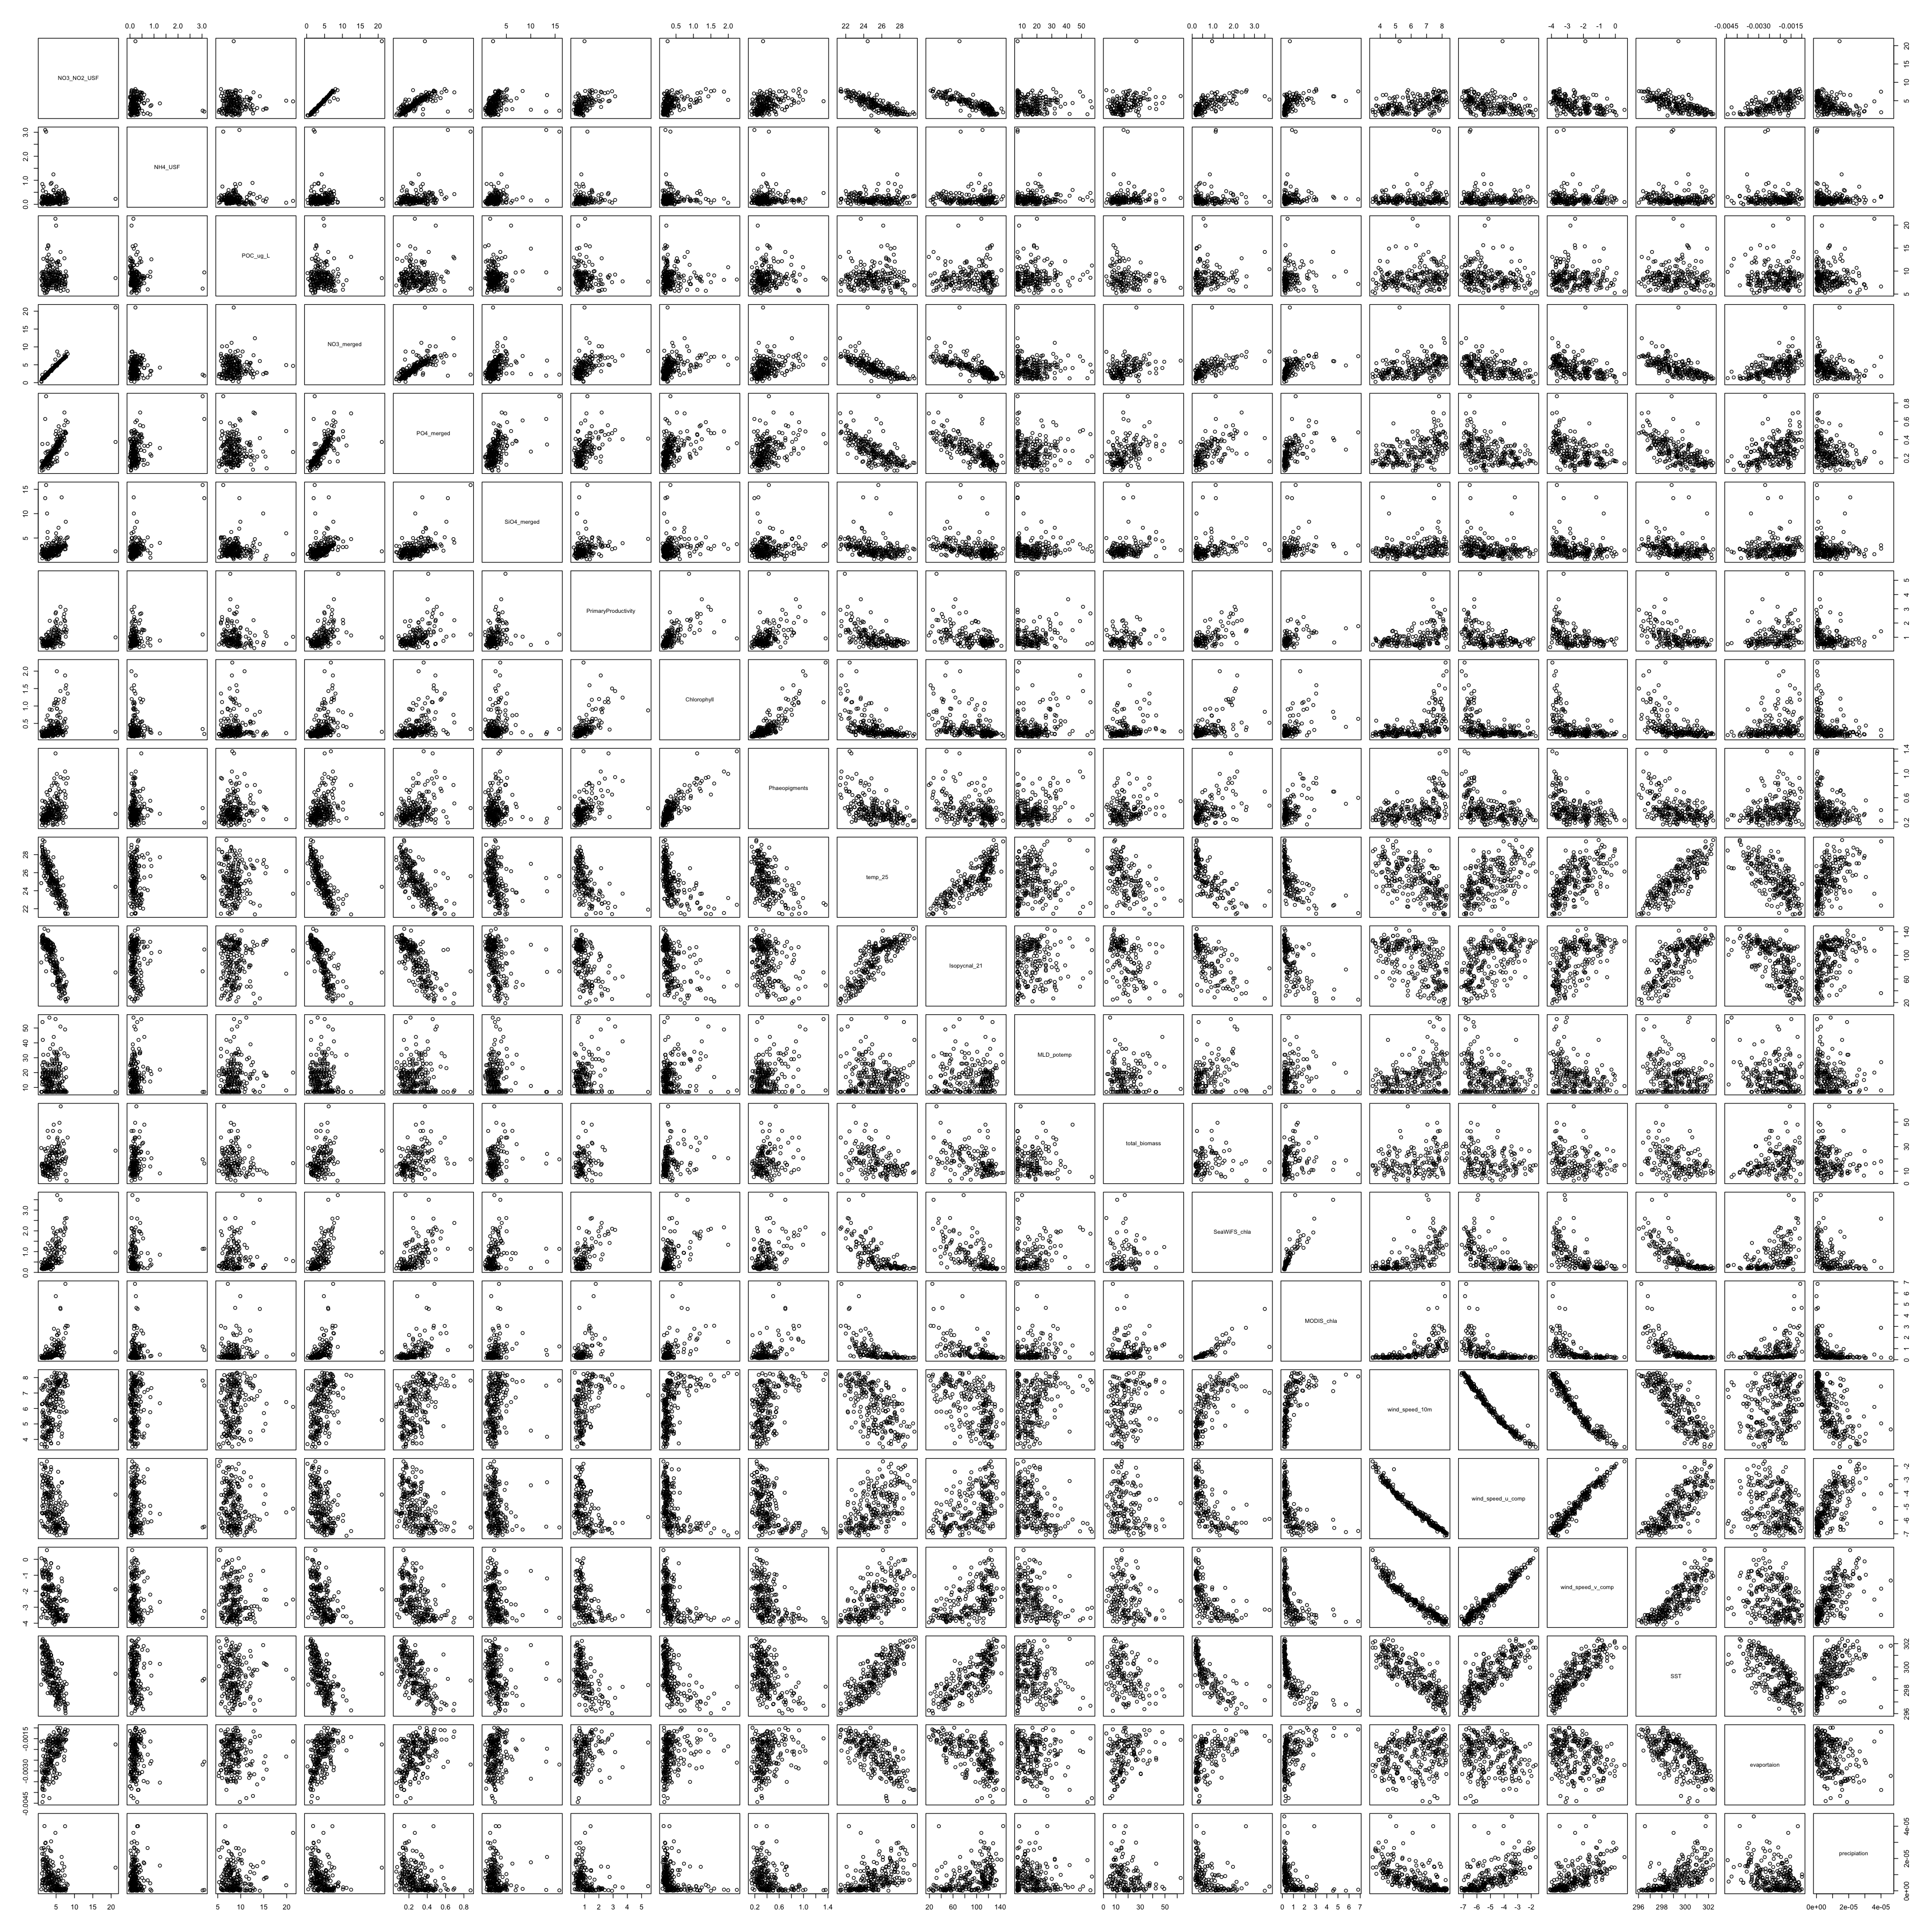

In [50]:
options(repr.plot.width=30, repr.plot.height=30)
#pdf("Plots/GiantCorrelationPlot.pdf", width=30, height=30) 
pairs(CARIACO_sub1)
#dev.off()


In [51]:
cor(CARIACO_sub1, use="complete.obs")

NO3_NO2_USF NH4_USF     POC_ug_L     NO3_merged  
NO3_NO2_USF          1.00000000 -0.04506157 -0.013451768  0.989264612
NH4_USF             -0.04506157  1.00000000 -0.199356798 -0.021374689
POC_ug_L            -0.01345177 -0.19935680  1.000000000  0.002492081
NO3_merged           0.98926461 -0.02137469  0.002492081  1.000000000
PO4_merged           0.41271160  0.71917511 -0.169212152  0.439747438
SiO4_merged          0.08588342  0.88119846 -0.176189065  0.102852883
PrimaryProductivity  0.30415177  0.07524447 -0.133348828  0.334105297
Chlorophyll          0.19580803  0.02496063  0.118302211  0.229914042
Phaeopigments        0.14954652  0.06800306  0.123629768  0.186331766
temp_25             -0.54918883 -0.03017494  0.004270468 -0.568719789
Isopycnal_21        -0.58601733 -0.14885124  0.157732219 -0.591158826
MLD_potemp          -0.01792083 -0.21158332  0.180104982 -0.002939344
total_biomass        0.36381180  0.10331623 -0.165522546  0.359768796
SeaWiFS_chla         0.44811548  0.14080984 -0.035490927  0.473010616
MODIS_chla           0.33560282  0.13897008  0.046318941  0.367526208
wind_speed_10m       0.16394531  0.17478593  0.118809576  0.192368303
wind_speed_u_comp   -0.14708057 -0.16538317 -0.133386305 -0.177581125
wind_speed_v_comp   -0.19106910 -0.15204560 -0.102502954 -0.219590021
SST                 -0.39689417 -0.07932069 -0.014759693 -0.432561125
evaportaion          0.42207751 -0.01374003 -0.245526646  0.442051460
precipiation        -0.03620187 -0.13199857 -0.061876309 -0.071345586
                    PO4_merged   SiO4_merged PrimaryProductivity Chlorophyll
NO3_NO2_USF          0.412711603  0.08588342  0.30415177          0.19580803
NH4_USF              0.719175110  0.88119846  0.07524447          0.02496063
POC_ug_L            -0.169212152 -0.17618907 -0.13334883          0.11830221
NO3_merged           0.439747438  0.10285288  0.33410530          0.22991404
PO4_merged           1.000000000  0.76248574  0.40305532          0.33014980
SiO4_merged          0.762485745  1.00000000  0.27366288          0.14221483
PrimaryProductivity  0.403055321  0.27366288  1.00000000          0.75171983
Chlorophyll          0.330149799  0.14221483  0.75171983          1.00000000
Phaeopigments        0.321523850  0.12673779  0.69196798          0.89540929
temp_25             -0.529654379 -0.24104819 -0.54115563         -0.52693009
Isopycnal_21        -0.658682285 -0.31905179 -0.52037238         -0.40635392
MLD_potemp          -0.001432157 -0.07314608  0.25788545          0.41820306
total_biomass        0.400215923  0.15746910  0.17051454          0.19911977
SeaWiFS_chla         0.543461430  0.32988038  0.59970652          0.54972797
MODIS_chla           0.492317351  0.28591555  0.57562211          0.67734765
wind_speed_10m       0.392410974  0.26582495  0.49887400          0.53512281
wind_speed_u_comp   -0.342445923 -0.23798729 -0.47191844         -0.49240342
wind_speed_v_comp   -0.381471186 -0.22874923 -0.43887457         -0.47069779
SST                 -0.476788804 -0.22174766 -0.57161422         -0.58207653
evaportaion          0.295007537  0.08388928  0.29579777          0.19041257
precipiation        -0.169384578 -0.19583130 -0.25749658         -0.30970299
                    Phaeopigments temp_25      ⋯ MLD_potemp   total_biomass
NO3_NO2_USF          0.14954652   -0.549188828 ⋯ -0.017920834  0.36381180  
NH4_USF              0.06800306   -0.030174938 ⋯ -0.211583321  0.10331623  
POC_ug_L             0.12362977    0.004270468 ⋯  0.180104982 -0.16552255  
NO3_merged           0.18633177   -0.568719789 ⋯ -0.002939344  0.35976880  
PO4_merged           0.32152385   -0.529654379 ⋯ -0.001432157  0.40021592  
SiO4_merged          0.12673779   -0.241048193 ⋯ -0.073146081  0.15746910  
PrimaryProductivity  0.69196798   -0.541155634 ⋯  0.257885446  0.17051454  
Chlorophyll          0.89540929   -0.526930090 ⋯  0.418203060  0.19911977  
Phaeopigments        1.00000000   -0.433545005 ⋯  0.358381646  0.10449838  
temp_25             -0.433

In [52]:
cormat <- round(cor(CARIACO_sub1, use="complete.obs"),2)
head(cormat)

NO3_NO2_USF NH4_USF POC_ug_L NO3_merged PO4_merged SiO4_merged
NO3_NO2_USF  1.00       -0.05   -0.01     0.99       0.41       0.09      
NH4_USF     -0.05        1.00   -0.20    -0.02       0.72       0.88      
POC_ug_L    -0.01       -0.20    1.00     0.00      -0.17      -0.18      
NO3_merged   0.99       -0.02    0.00     1.00       0.44       0.10      
PO4_merged   0.41        0.72   -0.17     0.44       1.00       0.76      
SiO4_merged  0.09        0.88   -0.18     0.10       0.76       1.00      
            PrimaryProductivity Chlorophyll Phaeopigments temp_25 ⋯ MLD_potemp
NO3_NO2_USF  0.30               0.20        0.15          -0.55   ⋯ -0.02     
NH4_USF      0.08               0.02        0.07          -0.03   ⋯ -0.21     
POC_ug_L    -0.13               0.12        0.12           0.00   ⋯  0.18     
NO3_merged   0.33               0.23        0.19          -0.57   ⋯  0.00     
PO4_merged   0.40               0.33        0.32          -0.53   ⋯  0.00     
SiO4_merged  0.27               0.14        0.13          -0.24   ⋯ -0.07     
            total_biomass SeaWiFS_chla MODIS_chla wind_speed_10m
NO3_NO2_USF  0.36          0.45        0.34       0.16          
NH4_USF      0.10          0.14        0.14       0.17          
POC_ug_L    -0.17         -0.04        0.05       0.12          
NO3_merged   0.36          0.47        0.37       0.19          
PO4_merged   0.40          0.54        0.49       0.39          
SiO4_merged  0.16          0.33        0.29       0.27          
            wind_speed_u_comp wind_speed_v_comp SST   evaportaion precipiation
NO3_NO2_USF -0.15             -0.19             -0.40  0.42       -0.04       
NH4_USF     -0.17             -0.15             -0.08 -0.01       -0.13       
POC_ug_L    -0.13             -0.10             -0.01 -0.25       -0.06       
NO3_merged  -0.18             -0.22             -0.43  0.44       -0.07       
PO4_merged  -0.34             -0.38             -0.48  0.30       -0.17       
SiO4_merged -0.24             -0.23             -0.22  0.08       -0.20

In [53]:
library(reshape2)
melted_cormat <- melt(cormat)
head(melted_cormat)

Var1        Var2        value
1 NO3_NO2_USF NO3_NO2_USF  1.00
2 NH4_USF     NO3_NO2_USF -0.05
3 POC_ug_L    NO3_NO2_USF -0.01
4 NO3_merged  NO3_NO2_USF  0.99
5 PO4_merged  NO3_NO2_USF  0.41
6 SiO4_merged NO3_NO2_USF  0.09

In [54]:
# Get lower triangle of the correlation matrix
  get_lower_tri<-function(cormat){
    cormat[upper.tri(cormat)] <- NA
    return(cormat)
  }
  # Get upper triangle of the correlation matrix
  get_upper_tri <- function(cormat){
    cormat[lower.tri(cormat)]<- NA
    return(cormat)
  }

In [55]:
upper_tri <- get_upper_tri(cormat)
upper_tri

NO3_NO2_USF NH4_USF POC_ug_L NO3_merged PO4_merged
NO3_NO2_USF          1          -0.05   -0.01     0.99       0.41     
NH4_USF             NA           1.00   -0.20    -0.02       0.72     
POC_ug_L            NA             NA    1.00     0.00      -0.17     
NO3_merged          NA             NA      NA     1.00       0.44     
PO4_merged          NA             NA      NA       NA       1.00     
SiO4_merged         NA             NA      NA       NA         NA     
PrimaryProductivity NA             NA      NA       NA         NA     
Chlorophyll         NA             NA      NA       NA         NA     
Phaeopigments       NA             NA      NA       NA         NA     
temp_25             NA             NA      NA       NA         NA     
Isopycnal_21        NA             NA      NA       NA         NA     
MLD_potemp          NA             NA      NA       NA         NA     
total_biomass       NA             NA      NA       NA         NA     
SeaWiFS_chla        NA             NA      NA       NA         NA     
MODIS_chla          NA             NA      NA       NA         NA     
wind_speed_10m      NA             NA      NA       NA         NA     
wind_speed_u_comp   NA             NA      NA       NA         NA     
wind_speed_v_comp   NA             NA      NA       NA         NA     
SST                 NA             NA      NA       NA         NA     
evaportaion         NA             NA      NA       NA         NA     
precipiation        NA             NA      NA       NA         NA     
                    SiO4_merged PrimaryProductivity Chlorophyll Phaeopigments
NO3_NO2_USF          0.09        0.30               0.20        0.15         
NH4_USF              0.88        0.08               0.02        0.07         
POC_ug_L            -0.18       -0.13               0.12        0.12         
NO3_merged           0.10        0.33               0.23        0.19         
PO4_merged           0.76        0.40               0.33        0.32         
SiO4_merged          1.00        0.27               0.14        0.13         
PrimaryProductivity    NA        1.00               0.75        0.69         
Chlorophyll            NA          NA               1.00        0.90         
Phaeopigments          NA          NA                 NA        1.00         
temp_25                NA          NA                 NA          NA         
Isopycnal_21           NA          NA                 NA          NA         
MLD_potemp             NA          NA                 NA          NA         
total_biomass          NA          NA                 NA          NA         
SeaWiFS_chla           NA          NA                 NA          NA         
MODIS_chla             NA          NA                 NA          NA         
wind_speed_10m         NA          NA                 NA          NA         
wind_speed_u_comp      NA          NA                 NA          NA         
wind_speed_v_comp      NA          NA                 NA          NA         
SST                    NA          NA                 NA          NA         
evaportaion            NA          NA                 NA          NA         
precipiation           NA          NA                 NA          NA         
                    temp_25 ⋯ MLD_potemp total_biomass SeaWiFS_chla MODIS_chla
NO3_NO2_USF         -0.55   ⋯ -0.02       0.36          0.45         0.34     
NH4_USF             -0.03   ⋯ -0.21       0.10          0.14         0.14     
POC_ug_L             0.00   ⋯  0.18      -0.17         -0.04         0.05     
NO3_merged          -0.57   ⋯  0.00       0.36          0.47         0.37     
PO4_merged          -0.53   ⋯  0.00       0.40          0.54         0.49     
SiO4_merged         -0.24   ⋯ -0.07       0.16          0.33         0.29     
PrimaryProductivity -0.54   ⋯  0.26       0.17          0.60         0.58     
Chlorophyll         -0.53   ⋯  0.42       0.20          0.55         0.68     
Phaeopigments       -0.43   ⋯  

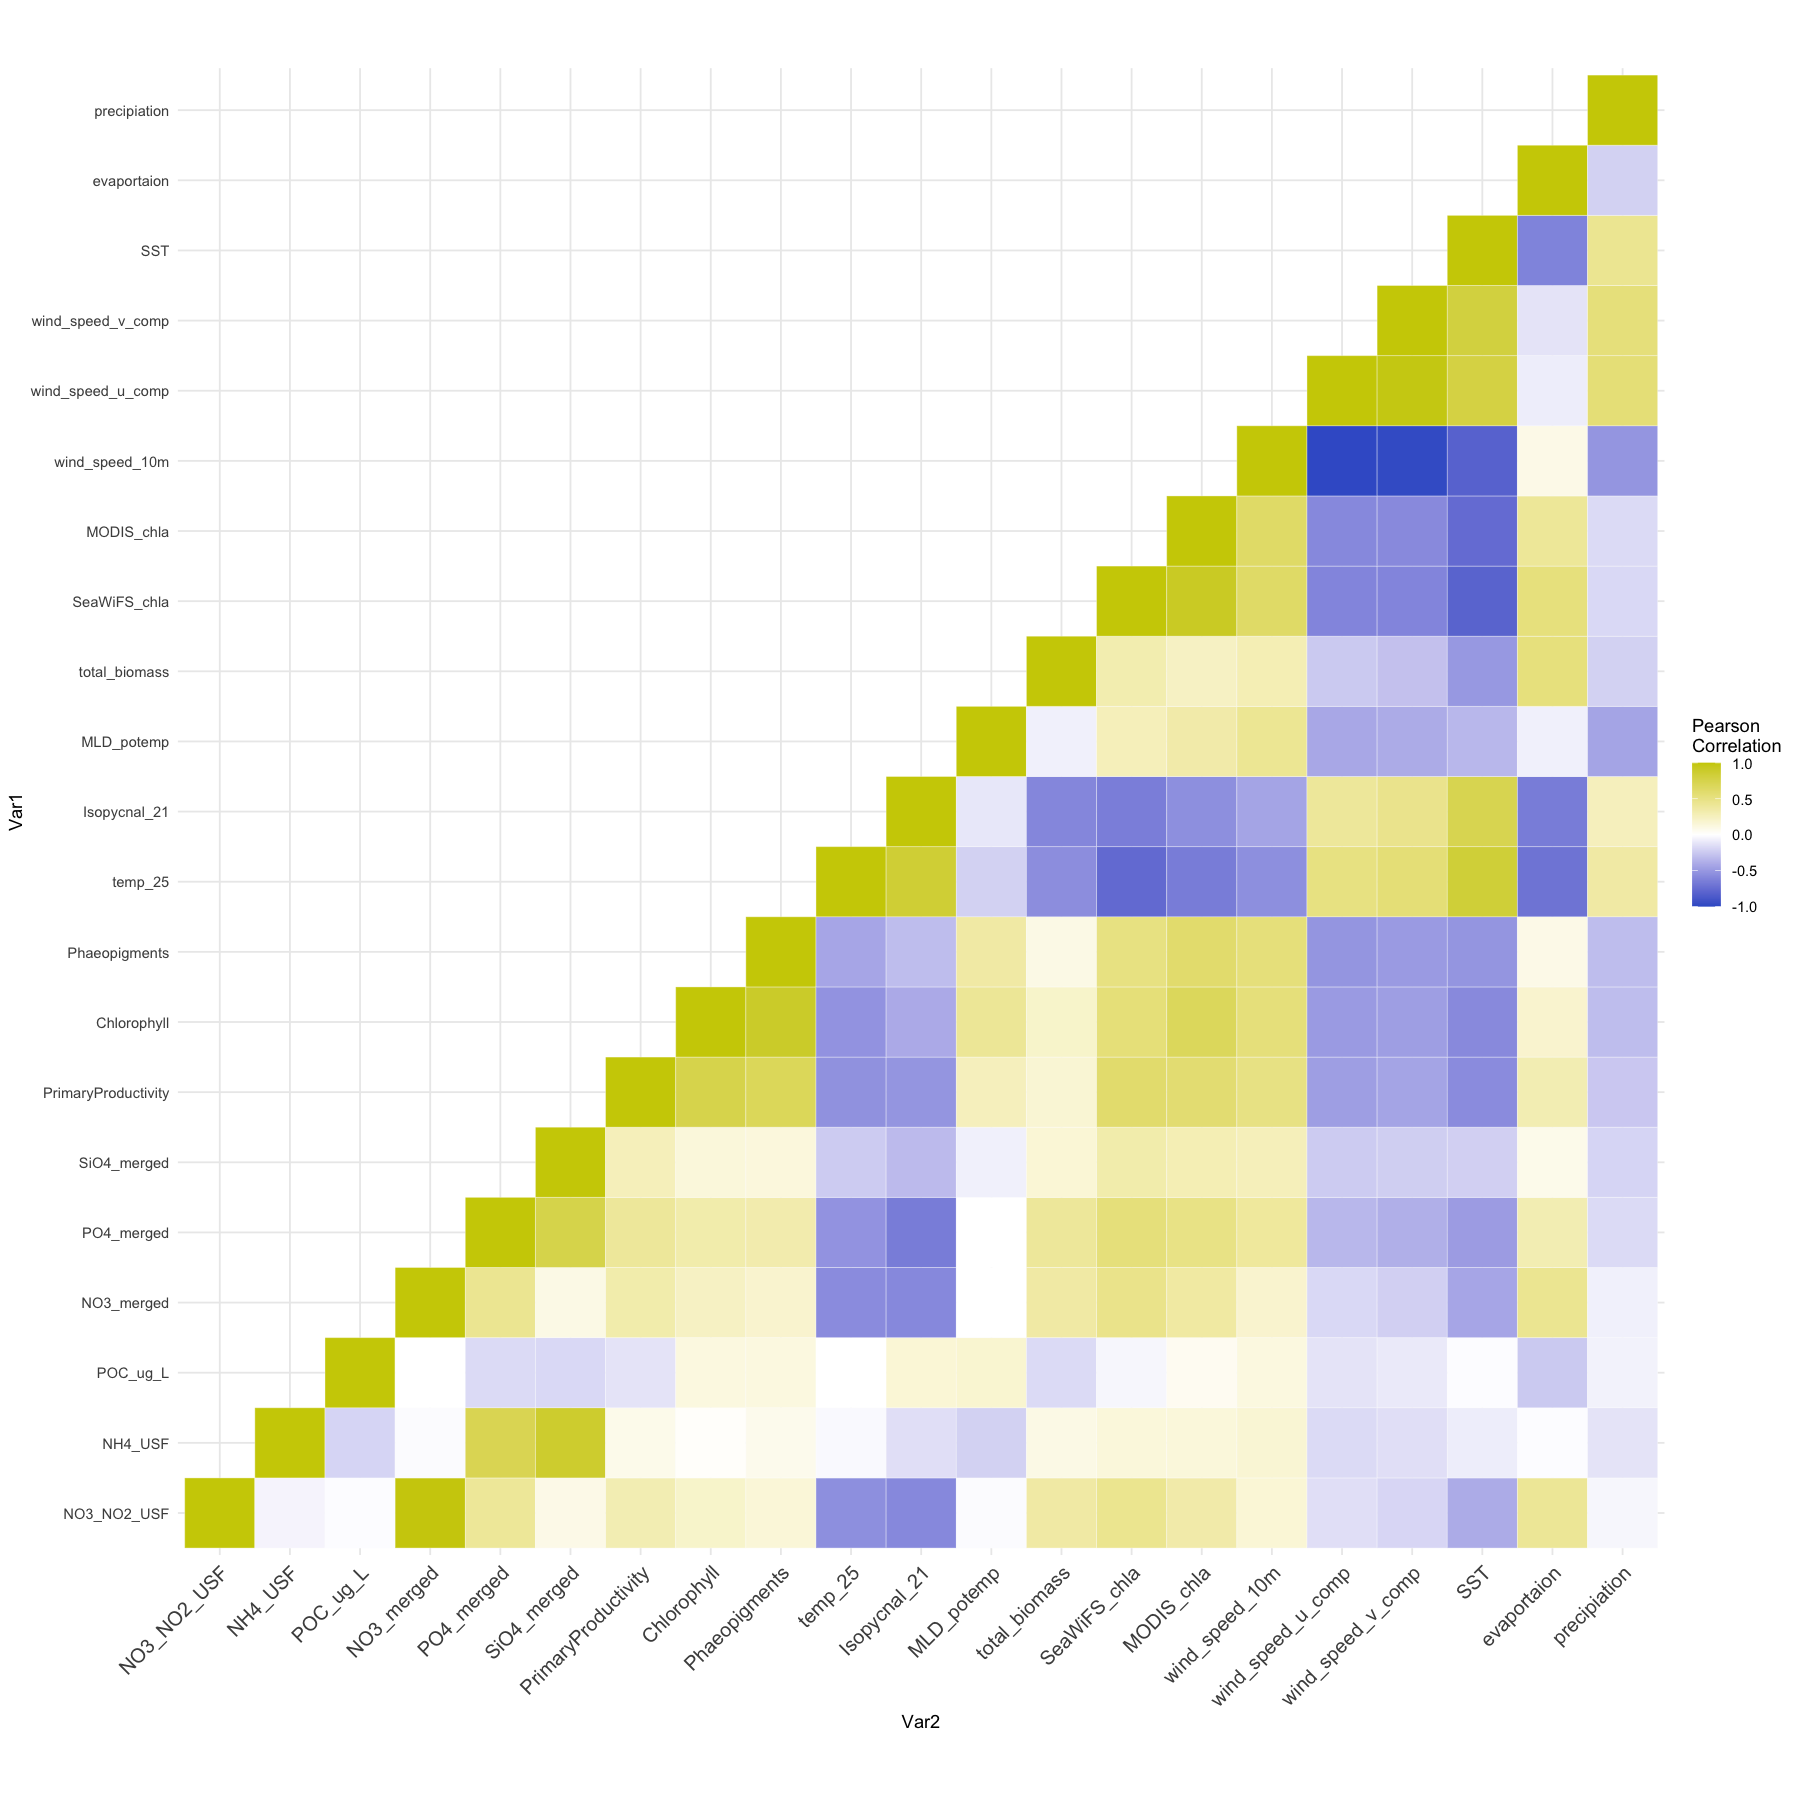

In [56]:
options(repr.plot.width=15, repr.plot.height=15)
#library(cowplot)
library(scales)
# Melt the correlation matrix
library(reshape2)
melted_cormat <- melt(upper_tri, na.rm = TRUE)
# Heatmap
library(ggplot2)
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "royalblue3", high ="yellow3", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()

In [57]:
ggsave("Plots/GiantCorrelationPlot_v2.pdf",width=15, height=15, dpi=300)